### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [2]:
import pandas as pd
data = pd.read_csv('heart.csv')
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 1025, Columns: 14


### Check Null Values In The Dataset

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check For Duplicate Data and Drop Them

In [7]:
data.duplicated().any()
data.drop_duplicates(inplace=True)

### Draw Correlation Matrix 

<Axes: >

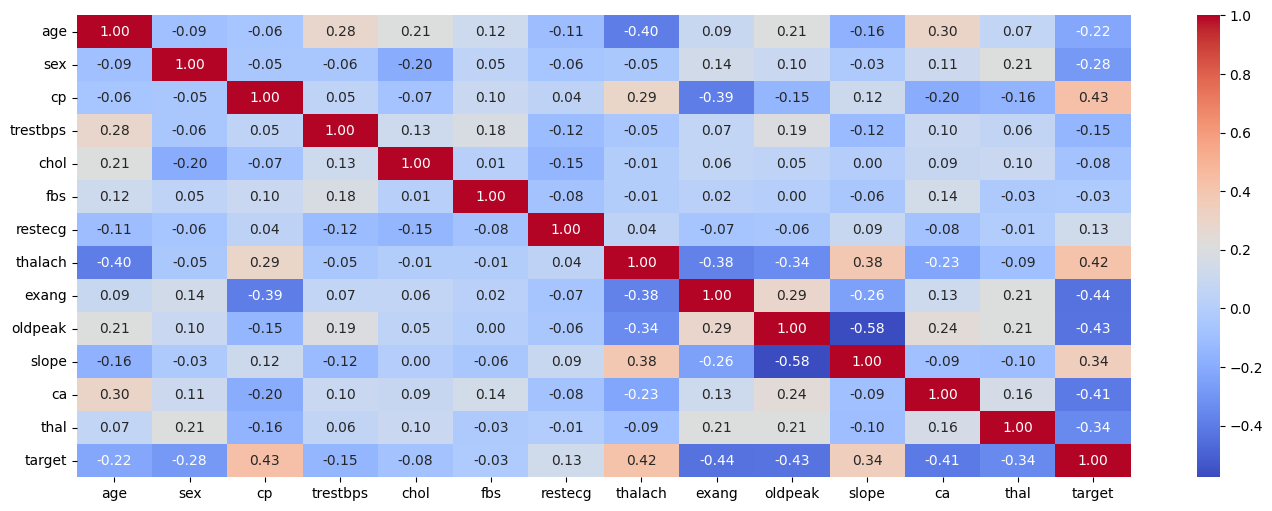

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

### How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

<Axes: xlabel='target'>

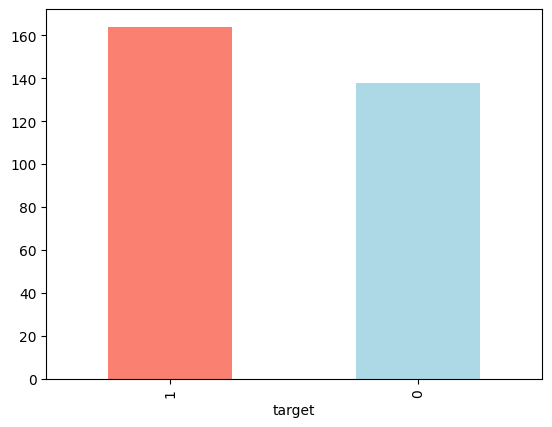

In [13]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

### Find Count of  Male & Female in this Dataset

In [15]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

### Find Gender Distribution According to The Target Variable

In [17]:
data.groupby('target')['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       92
        0       72
Name: count, dtype: int64

### Check Age Distribution In The Dataset

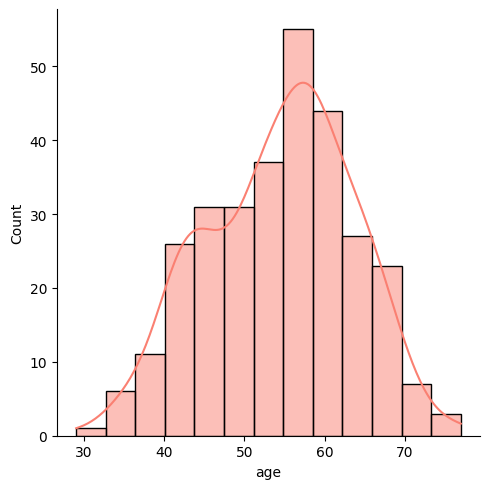

In [20]:
data['age'].value_counts()
sns.displot(data['age'], kde=True, color='salmon')

### Check Chest Pain Type

In [23]:
# check chest pain type
data['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

### Show The Chest Pain Distribution As Per Target Variable

In [26]:
data.groupby('target')['cp'].value_counts()

target  cp
0       0     104
        2      18
        1       9
        3       7
1       2      68
        1      41
        0      39
        3      16
Name: count, dtype: int64

### Show Fasting Blood Sugar Distribution According To Target Variable

In [ ]:
data.groupby('target')['fbs'].value_counts()

### Check Resting Blood Pressure Distribution

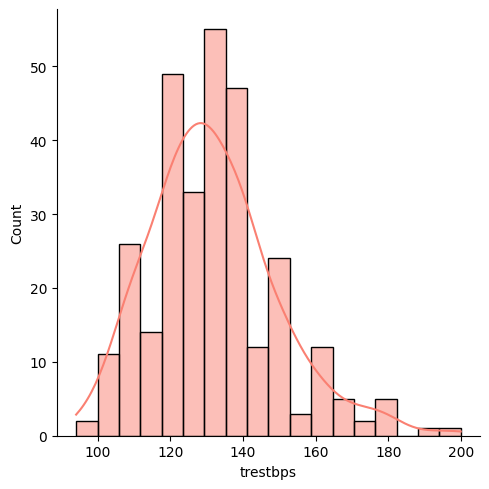

In [31]:
# Check Resting Blood Pressure Distribution
sns.displot(data['trestbps'], kde=True, color='salmon')

### Compare Resting Blood Pressure As Per Sex Column

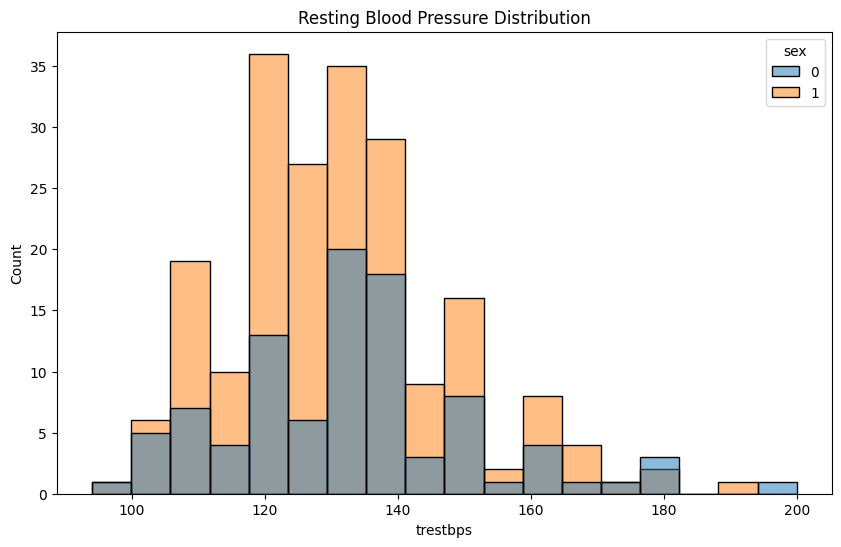

In [33]:
# Compare Resting Blood Pressure As per sex column
plt.figure(figsize=(10, 6))
sns.histplot(data, x='trestbps', hue='sex')
plt.title('Resting Blood Pressure Distribution')
plt.show()

### Show Distribution of Serum cholesterol


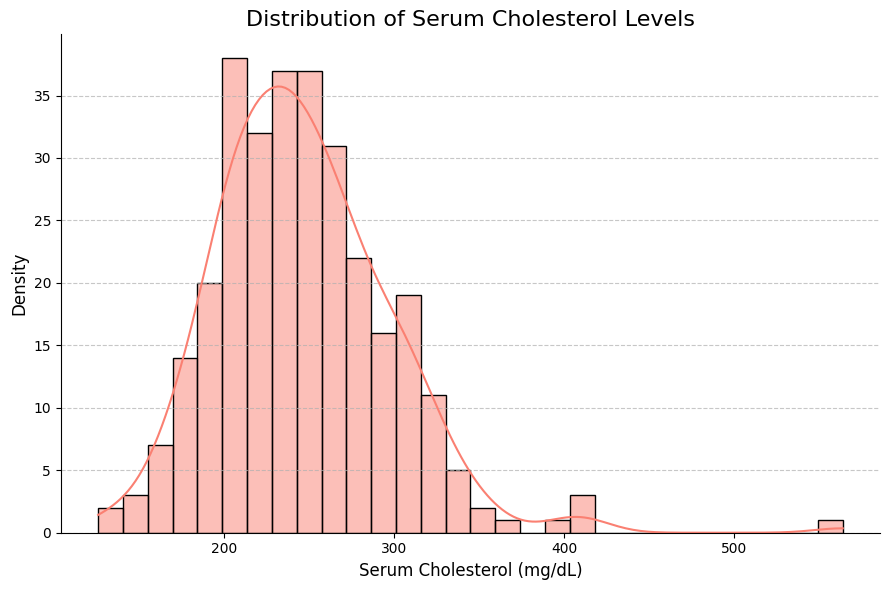

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enhanced plot
sns.displot(
    data['chol'], 
    kde=True, 
    color='salmon', 
    bins=30,  # More granularity in the histogram
    height=6,  # Adjust the figure size
    aspect=1.5,  # Make the plot wider
)

# Adding a title and labels for clarity
plt.title('Distribution of Serum Cholesterol Levels', fontsize=16)
plt.xlabel('Serum Cholesterol (mg/dL)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plot Continuous Variables

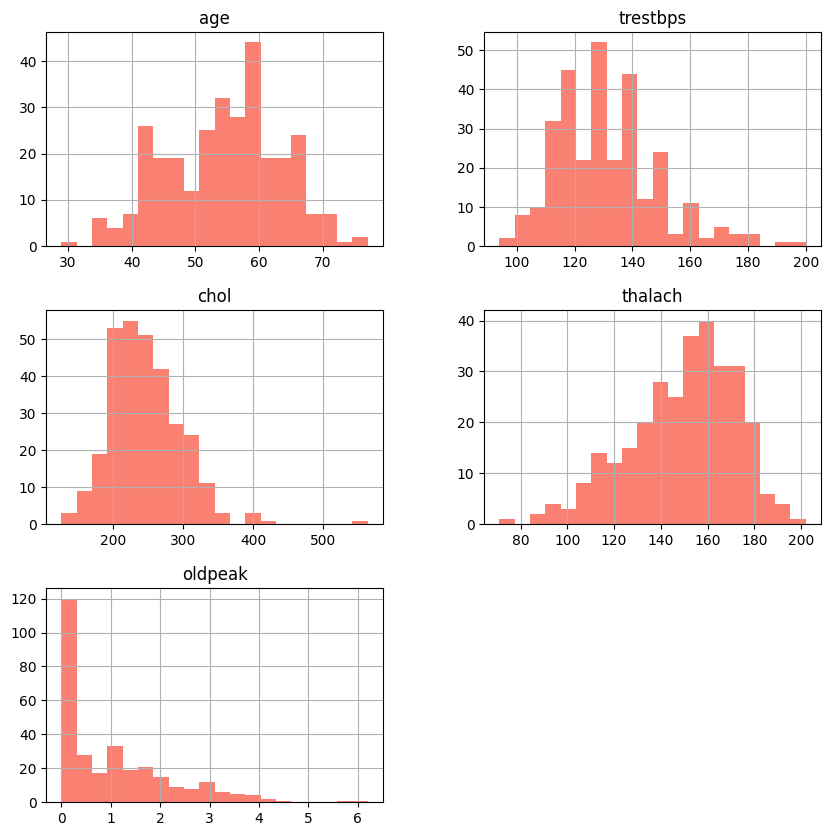

In [38]:
categorical_val, continuous_val = [], []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

data.hist(continuous_val, figsize=(10, 10), bins=20, color='salmon')
plt.show()